# **RandomForest Classifier**

## **Summary**
*Data Exploration: Use your Python skills to tell us more about what’s going on with this data.*

*Model Build: Use Python to build a model to help us predict when “Delivery Status” = “Late delivery”.*
  * Packages
  * EDA and Visualizations
    1. Time-based analysis to identify trends or patterns in sales over time.
    2. Customer segmentation based on different customer types or geographical regions.
    3. Analyzing transaction patterns based on product categories or payment methods.
  * Model

## Packages

In [231]:
import csv

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import randint

from matplotlib import rcParams
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Exploratory Data Analysis to visualize the distribution of numerical and categorical variables

In [232]:
df = pd.read_csv('/Users/karlmbouombouo/Documents/Python - Project/unfi_sample_data_20230721.csv', encoding=('ISO-8859-1'), low_memory=False)
df.isnull().values.any()
df.isnull().sum().sum()
df = df.drop(['Order Zipcode', 'Customer Email', 'Customer Street', 'Product Description', 'Product Status', 'Customer City', 'Customer Fname', 'Customer Lname', 'Customer Password',
              'Customer Street', 'Customer State', 'Order City', 'Department Id', 'Department Name', 'Product Card Id', 'Order Item Cardprod Id', 'Order Item Discount','Order Item Discount Rate',
              'Order Item Profit Ratio', 'Order Item Product Price', 'Customer Zipcode', 'Order Country', 'Order Profit Per Order', 'Latitude', 'Longitude', 'Market', 'Order State',
              'Product Name', 'shipping date (DateOrders)'], axis=1)
df.head()

for col in df.columns:
    print(col)

Type
Days for shipping (real)
Benefit per order
Sales per customer
Delivery Status
Category Id
Category Name
Customer Country
Customer Id
Customer Segment
Order Customer Id
order date (DateOrders)
Order Id
Order Item Id
Order Item Quantity
Sales
Order Item Total
Order Region
Order Status
Product Category Id
Product Price
Shipping Mode


In [233]:
df.isnull().values.any()


False

In [234]:
print(df.info())   # Get information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40587 entries, 0 to 40586
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      40587 non-null  object 
 1   Days for shipping (real)  40587 non-null  int64  
 2   Benefit per order         40587 non-null  float64
 3   Sales per customer        40587 non-null  float64
 4   Delivery Status           40587 non-null  object 
 5   Category Id               40587 non-null  int64  
 6   Category Name             40587 non-null  object 
 7   Customer Country          40587 non-null  object 
 8   Customer Id               40587 non-null  int64  
 9   Customer Segment          40587 non-null  object 
 10  Order Customer Id         40587 non-null  int64  
 11  order date (DateOrders)   40587 non-null  object 
 12  Order Id                  40587 non-null  int64  
 13  Order Item Id             40587 non-null  int64  
 14  Order 

In [235]:
print(df.describe())   # Get summary statistics for numerical columns

       Days for shipping (real)  Benefit per order  Sales per customer  \
count              40587.000000       40587.000000        40587.000000   
mean                   3.496637          21.614943          183.233387   
std                    1.627726         107.615723          120.746153   
min                    0.000000       -4274.979980            7.490000   
25%                    2.000000           7.180000          103.989998   
50%                    3.000000          31.430000          163.990005   
75%                    5.000000          64.754997          248.960007   
max                    6.000000         721.599976         1899.989990   

        Category Id   Customer Id  Order Customer Id      Order Id  \
count  40587.000000  40587.000000       40587.000000  40587.000000   
mean      31.842733   6729.213862        6729.213862  36325.917831   
std       15.709018   4180.110937        4180.110937  21076.442834   
min        2.000000      1.000000           1.000000 

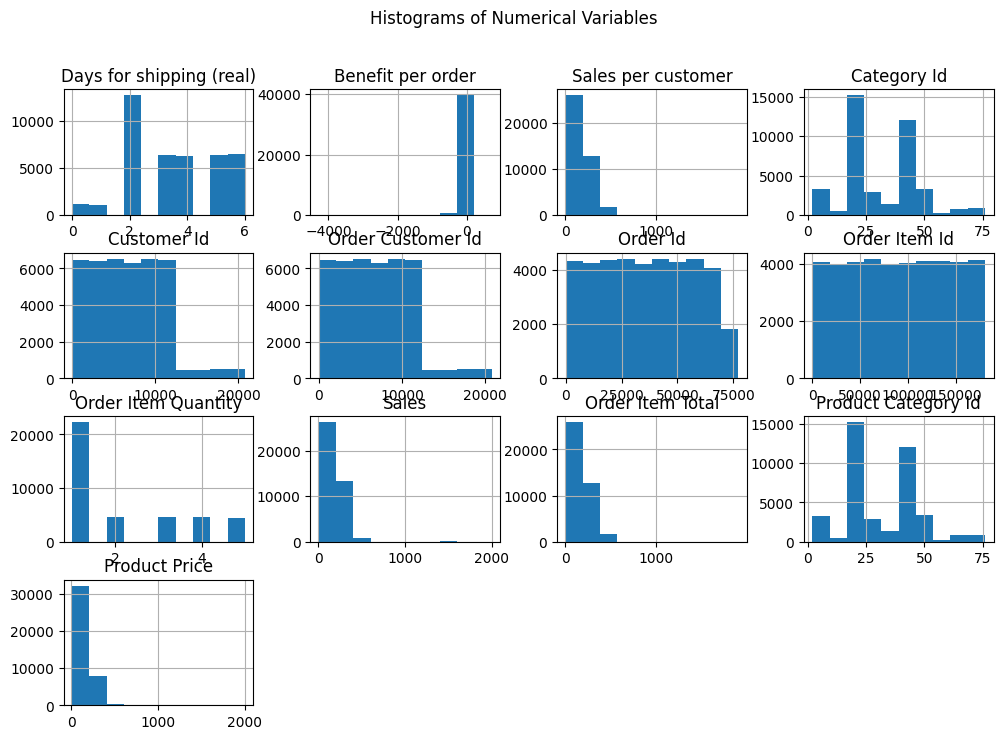

In [236]:
# Visualize categorical variables using bar plots
df.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=90)
    plt.title(f'Bar Plot of {column}')
    plt.show()

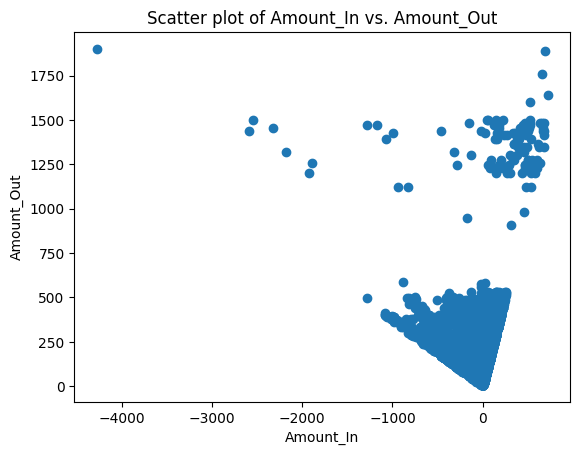

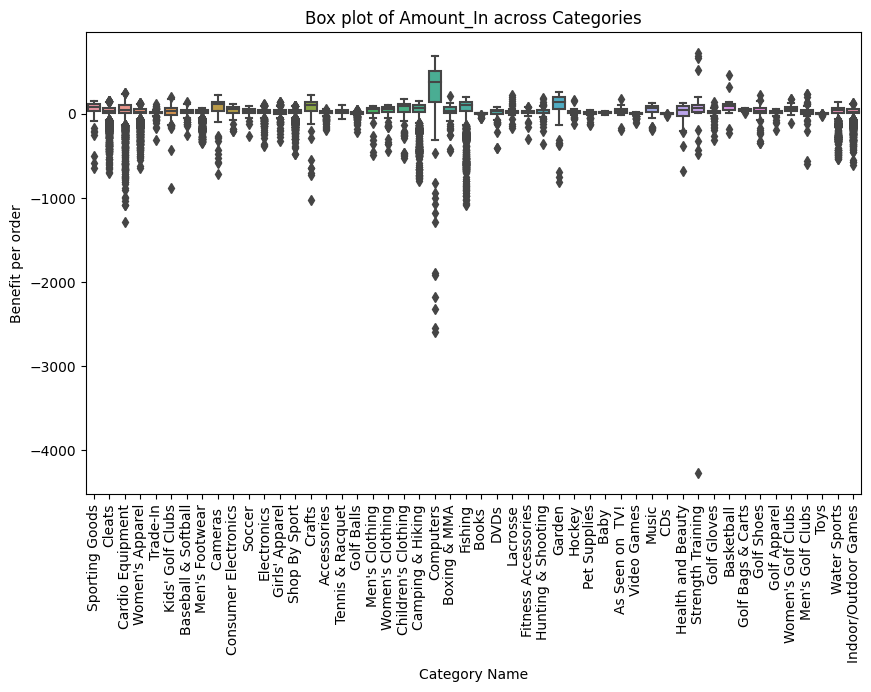

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


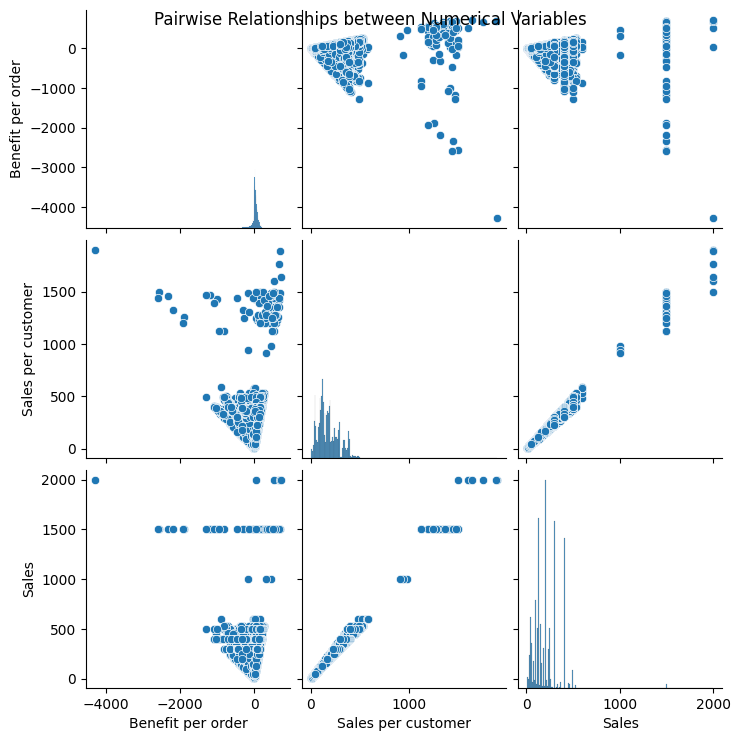

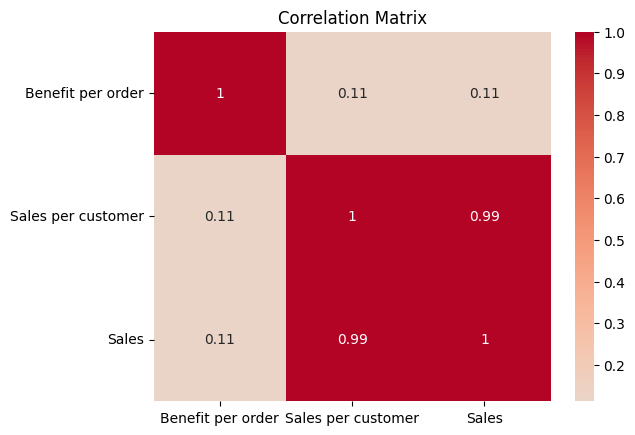

In [209]:
# Scatter plot for two numerical variables
plt.scatter(df['Benefit per order'], df['Sales per customer'])
plt.xlabel('Amount_In')
plt.ylabel('Amount_Out')
plt.title('Scatter plot of Amount_In vs. Amount_Out')
plt.show()

# Box plot to visualize the distribution of numerical variables across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category Name', y='Benefit per order', data=df)
plt.xticks(rotation=90)
plt.title('Box plot of Amount_In across Categories')
plt.show()

# Pair plot to visualize pairwise relationships between numerical variables
sns.pairplot(df[['Benefit per order', 'Sales per customer', 'Sales']])
plt.suptitle('Pairwise Relationships between Numerical Variables')
plt.show()

# Correlation matrix to see the correlation between numerical variables
correlation_matrix = df[['Benefit per order', 'Sales per customer', 'Sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

### 1. Time-based analysis to identify trends or patterns in sales over time.

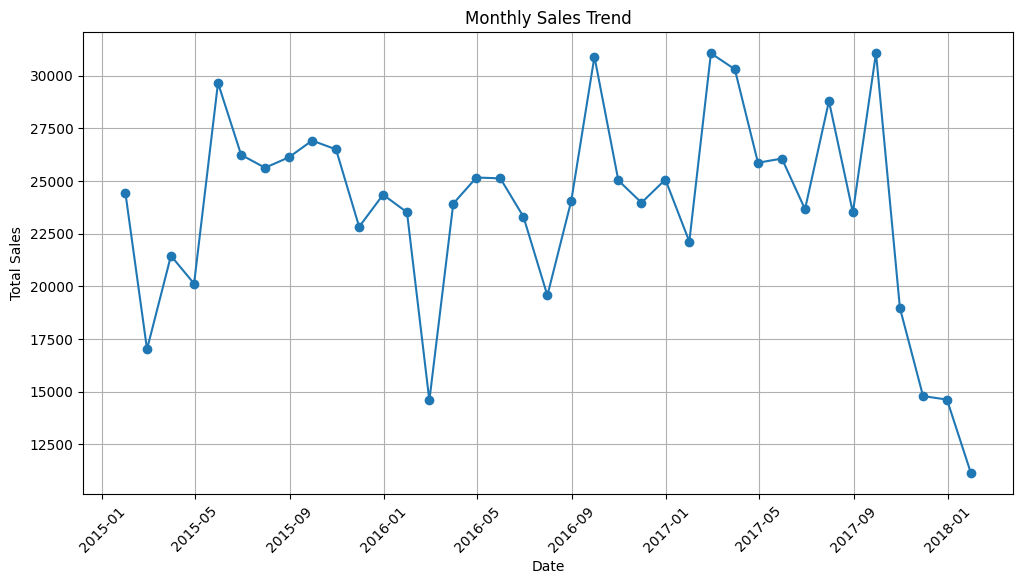

In [212]:
# This code will generate histograms for numerical variables and bar plots for categorical variables, allowing you to visualize the distribution and patterns in your data
# Convert "Order_Date" column to datetime type
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df
# Set the "Order_Date" column as the DataFrame's index
df.set_index('order date (DateOrders)', inplace=True)

# Resample the data by a specific time frequency (e.g., monthly) and calculate the sum of sales for each period
monthly_sales = df['Benefit per order'].resample('M').sum()

# Plotting the time-based sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Customer segmentation based on different customer types or geographical regions.

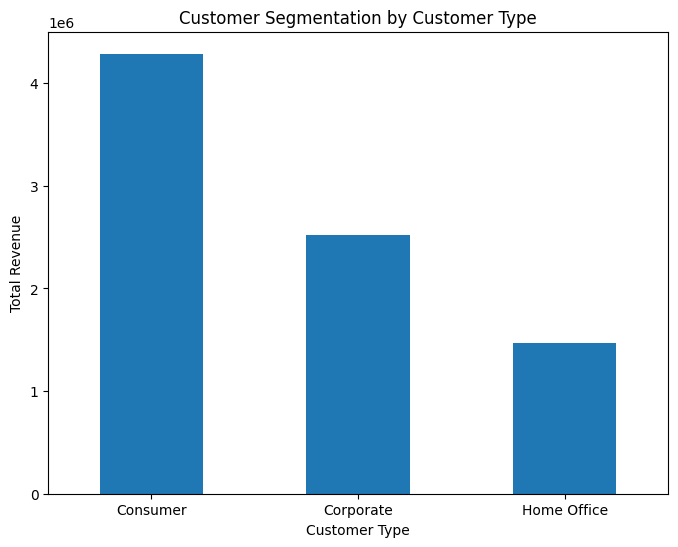

In [213]:
# Calculate total revenue by customer type
revenue_by_customer_type = df.groupby('Customer Segment')['Sales'].sum()

# Visualize the distribution of revenue by customer type
plt.figure(figsize=(8, 6))
revenue_by_customer_type.plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.title('Customer Segmentation by Customer Type')
plt.xticks(rotation=0)
plt.show()

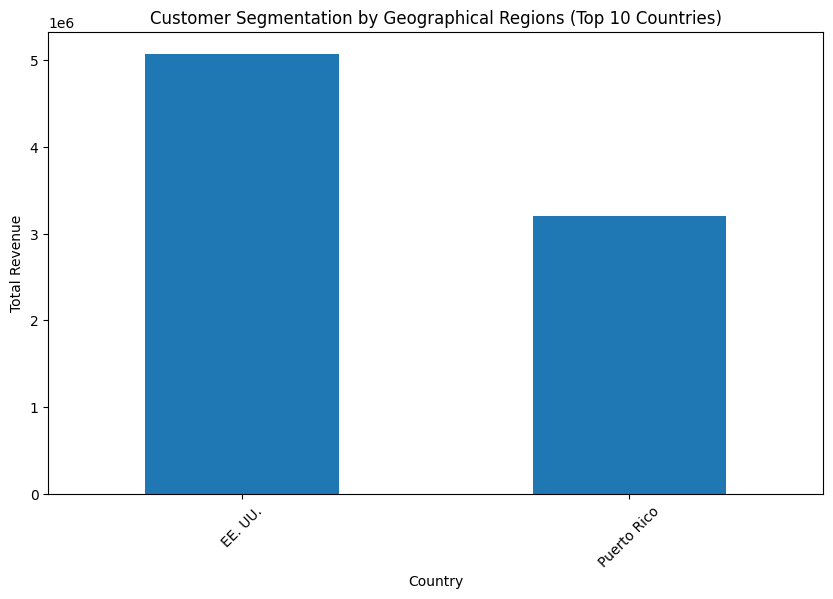

In [214]:
# Calculate total revenue by country (geographical region)
revenue_by_country = df.groupby('Customer Country')['Sales'].sum()

# Visualize the distribution of revenue by country (top 10 countries)
top_countries = revenue_by_country.nlargest(10).index
top_revenue_by_country = revenue_by_country.loc[top_countries]

plt.figure(figsize=(10, 6))
top_revenue_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Customer Segmentation by Geographical Regions (Top 10 Countries)')
plt.xticks(rotation=45)
plt.show()

### 3. Analyzing transaction patterns based on product categories or payment methods.

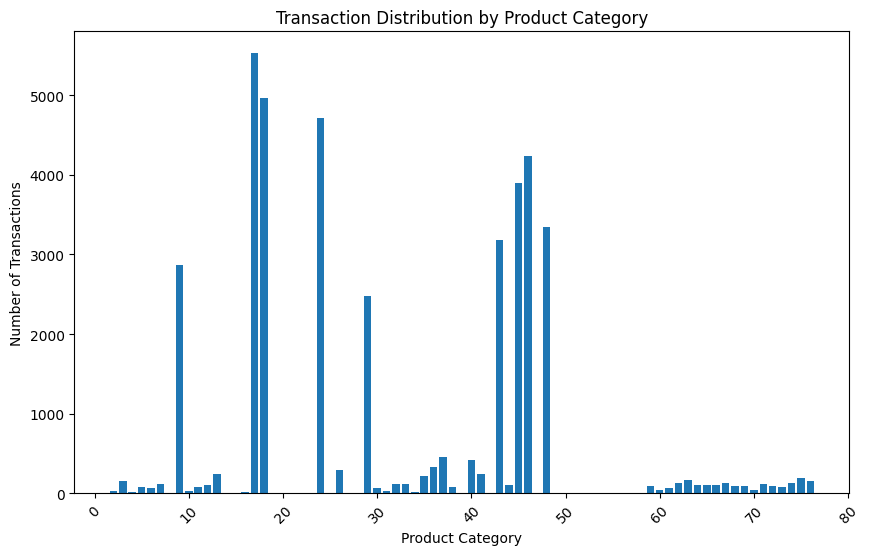

In [215]:
#Analyzing Transaction Patterns Based on Product Categories
# Group the data by product category and calculate the total number of transactions in each category
product_category_counts = df['Category Id'].value_counts()

# Create a bar chart to visualize the distribution of transactions across product categories
plt.figure(figsize=(10, 6))
plt.bar(product_category_counts.index, product_category_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Transaction Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

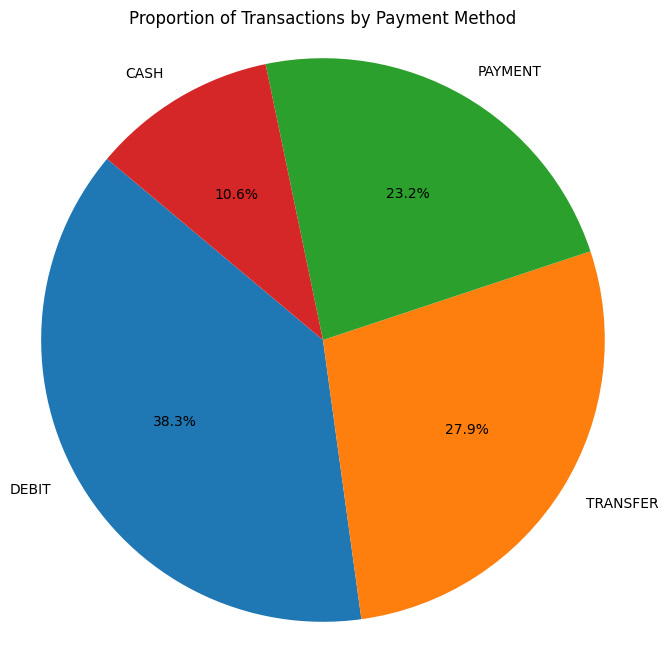

In [216]:
#Analyzing Transaction Patterns Based on Payment Methods
# Group the data by payment method and calculate the total number of transactions for each method
payment_method_counts = df['Type'].value_counts()

# Create a pie chart to visualize the proportion of transactions for each payment method
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts.values, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transactions by Payment Method')
plt.axis('equal')
plt.show()

## Model to help us predict when “Delivery Status” = “Late delivery”

In [ ]:
# Assuming you have already loaded the "data1" DataFrame from the previous sections.

# Preprocessing
df['Late_Delivery'] = df['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)
features = ['Type', 'Days for shipping (real)', 'Benefit per order', 'Late_Delivery']
df = df.dropna(subset=['Late_Delivery'])
model_data = df[features].copy()

# Convert the 'Type' column to numerical form using one-hot encoding
model_data = pd.get_dummies(model_data, columns=['Type'], prefix='', prefix_sep='')

# Split the data into training and testing sets
X = model_data.drop(columns=['Late_Delivery'])
y = model_data['Late_Delivery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Visualization to understand how the model make predictions
for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [228]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x347c965d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x347c2fb50>})

In [227]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 146}


In [ ]:
# Baseline model
# We have 40587 rows in that data frame
print(df['Delivery Status'].value_counts()['Late delivery']) # count how Late delivery in the data
baseline_model = 22496/40587
print("Baseline model:", baseline_model)

# Train the Random Forest model with some adjustments
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

The baseline of our model is 55.43%

The accuracy of our model is 76%; from all the classes 76 are predicted correctly.

The precision show that we are 83.24% correct when prediciting "Late Delivery".

The model has 70.41% recall when predicting when “Delivery Status” = “Late delivery”.

Confusion Matrix:


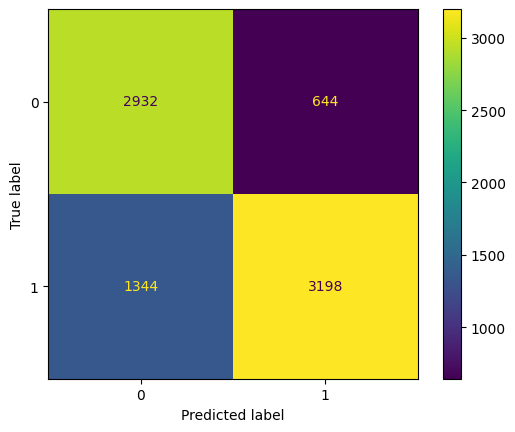

In [181]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot();

From the confusion Matrix:
2932 True Positive
3198 True Negative
644 False Positive (Type I error)
1344 False negative (Type II error)

In [182]:
print("Classification Report:")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      3576
           1       0.83      0.70      0.76      4542

    accuracy                           0.76      8118
   macro avg       0.76      0.76      0.75      8118
weighted avg       0.77      0.76      0.76      8118



The f1-score of our model is 0.76 that is close to 1.
Since this value is close to 1, it tells us that the model does a good job of predicting whether the delivery is late or not.

In [230]:
# Check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": rf_classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
0,Days for shipping (real),0.904321
1,Benefit per order,0.076638
5,TRANSFER,0.011519
3,DEBIT,0.003637
4,PAYMENT,0.002317
2,CASH,0.001568


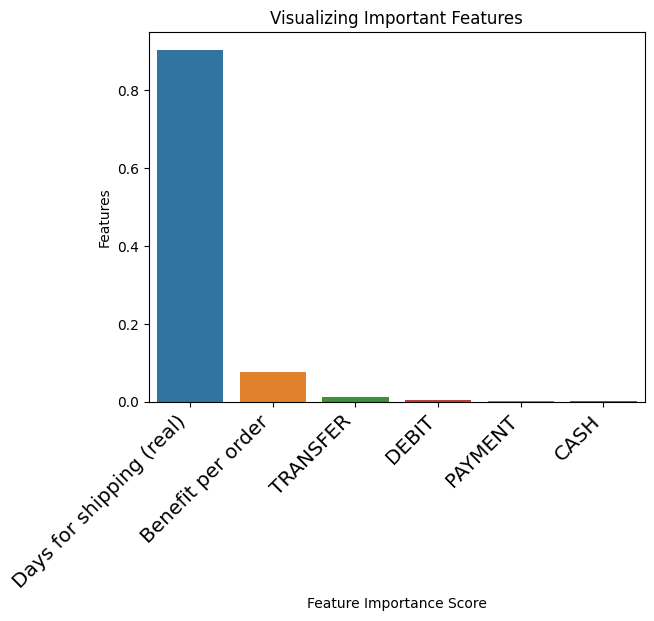

In [179]:
# Visualize important featuers

# Creating a bar plot
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

# Add labels to your
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

### Model conclusion

Our model had a 76% accuracy score. That is well above the baseline score. 

**We can conclude that our model is performing well.**